# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Krzysztof Baran
### ID : 4662148

## Student 2
### Name : Michał Okoń
### ID : 5056640

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [108]:
import nbformat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

In [109]:
# If this cell does not work try running ``
nb = nbformat.read("Lab3.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 815


## 1. Familiarization and discretization task – 1 A4 (5 Points)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

Investigating the dataset.

In [110]:
df = pd.read_csv("datasets/dataset_10/capture20110818.binetflow")
df.head()

# Print unique values of labels
df.Label.unique()

array(['flow=Background-TCP-Attempt', 'flow=Background-TCP-Established',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy', 'flow=Background',
       'flow=Background-UDP-Established', 'flow=Background-UDP-Attempt',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=To-Background-Grill', 'flow=Background-Attempt-cmpgw-CVUT',
       'flow=Background-UDP-NTP-Established-1',
       'flow=Background-google-webmail',
       'flow=Background-google-analytics11', 'flow=From-Normal-V51-Grill',
       'flow=Background-google-analytics10',
       'flow=From-Normal-V51-Stribrek',
       'flow=Background-google-analytics6', 'flow=To-Background-Stribrek',
       'flow=Background-google-analytics9',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics15',
       'flow=Background-google-analytics2', 'flow=From-Normal-V51-Jist',
       'flow=Background-google-analytics8', 'flow=To

In [111]:
# Print the number of null values
print("Number of Nan values: ")
print(df.isnull().sum())
print("####################################")

# Print types of features
print("Types of features: ")
for col in df.columns:
    print(col, ": ", type(df[col][0]))
print("####################################")

# Print the number of unique values for each feature
print("Number of unique values for each feature: ")
for col in df.columns:
    print(col, ": ", len(df[col].unique()))

Number of Nan values: 
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          6987
Dir               0
DstAddr           0
Dport        104215
State          1228
sTos          12852
dTos         186791
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
####################################
Types of features: 
StartTime :  <class 'str'>
Dur :  <class 'numpy.float64'>
Proto :  <class 'str'>
SrcAddr :  <class 'str'>
Sport :  <class 'str'>
Dir :  <class 'str'>
DstAddr :  <class 'str'>
Dport :  <class 'str'>
State :  <class 'str'>
sTos :  <class 'numpy.float64'>
dTos :  <class 'numpy.float64'>
TotPkts :  <class 'numpy.int64'>
TotBytes :  <class 'numpy.int64'>
SrcBytes :  <class 'numpy.int64'>
Label :  <class 'str'>
####################################
Number of unique values for each feature: 
StartTime :  1309789
Dur :  515748
Proto :  14
SrcAddr :  151256
Sport :  114793
Dir :  6
DstAddr :  72957
Dport :  47

Preprocessing data. Filling in the missing values and converting the types.

In [112]:
# Replace the Nan values of the sport and dport features with 0
df['Sport'] = df['Sport'].fillna("-1")
df['Dport'] = df['Dport'].fillna("-1")

# Turn the hex values of the sport and dport features into int if it is a hex value
df['Sport'] = df['Sport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)
df['Dport'] = df['Dport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)

# Change the type of the dport and sport features to int
df['Sport'] = df['Sport'].astype(int)
df['Dport'] = df['Dport'].astype(int)

# Replace one NaN value of the State
df['State'] = df['State'].fillna("None")

In [113]:
# Print the range of values for each feature
print("Range of values for each feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        continue
    print(col, ": ", df[col].min(), " - ", df[col].max())

Range of values for each feature: 
Dur :  0.0  -  3600.019287
Sport :  -1  -  65535
Dport :  -1  -  539032744
sTos :  0.0  -  192.0
dTos :  0.0  -  3.0
TotPkts :  1  -  1853001
TotBytes :  60  -  1933022240
SrcBytes :  0  -  1233899763


In [114]:
# Print unique strings of each feature
print("Unique values for each string feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        print(col, ": ", df[col].unique())

Unique values for each string feature: 
StartTime :  ['2011/08/18 10:21:46.633335' '2011/08/18 10:19:49.027650'
 '2011/08/18 10:22:07.160628' ... '2011/08/18 15:04:59.686325'
 '2011/08/18 15:04:59.690632' '2011/08/18 15:04:59.703972']
Proto :  ['tcp' 'udp' 'icmp' 'pim' 'arp' 'ipx/spx' 'rtp' 'rtcp' 'igmp' 'ipv6-icmp'
 'ipv6' 'esp' 'llc' 'udt']
SrcAddr :  ['93.45.239.29' '62.240.166.118' '147.32.86.148' ... '197.252.19.173'
 '83.183.55.171' '177.16.175.252']
Dir :  ['   ->' '  <?>' '   ?>' '  <->' '  who' '  <-']
DstAddr :  ['147.32.84.118' '147.32.84.229' '66.235.132.232' ... '213.102.121.139'
 '60.234.51.66' '173.21.49.153']
State :  ['S_RA' 'SRPA_PA' 'SR_SA' 'SRA_SA' 'SR_A' 'SRPA_FSPA' 'SRPA_SA' 'RA_'
 'S_SRA' 'FSPA_FSRPA' 'FSA_FSA' 'FRPA_FPA' 'CON' 'PA_PA' 'A_FPA' 'FPA_FPA'
 'INT' 'URP' 'RPA_FPA' 'FPA_FA' 'PA_FRA' 'FPA_FSPA' 'PA_A' 'A_PA' 'RA_FPA'
 'PA_RPA' 'FRPAC_FPA' 'A_' 'S_' 'FSPA_FSPA' 'FA_A' 'RPA_PA' 'SRPA_SPA'
 'FPA_FRA' 'R_' 'RSP' 'FA_FA' 'RED' 'SA_' 'FA_RA' 'FA_R' 'FPA_PA'
 

In [115]:
# Group the df into malicious and benign flows
# The label of malicious flows contain the string 'Botnet'
malicious_flows = df[df.Label.str.contains('Botnet')]
benign_flows = df[~df.Label.str.contains('Botnet')]

# Print the number of malicious and benign flows
print("Number of malicious flows: ", len(malicious_flows))
print("Number of benign flows: ", len(benign_flows))

Number of malicious flows:  106352
Number of benign flows:  1203439


In [116]:
display(malicious_flows.head())
display(benign_flows.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
90622,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS
90808,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS
90809,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...
90965,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS
90968,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [117]:
# Find Nan values
print("Number of Nan values in malicious flows: ")
print(malicious_flows.isnull().sum())
print("Number of Nan values in benign flows: ")
print(benign_flows.isnull().sum())

Number of Nan values in malicious flows: 
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport             0
Dir               0
DstAddr           0
Dport             0
State             0
sTos              0
dTos         106116
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Number of Nan values in benign flows: 
StartTime        0
Dur              0
Proto            0
SrcAddr          0
Sport            0
Dir              0
DstAddr          0
Dport            0
State            0
sTos         12852
dTos         80675
TotPkts          0
TotBytes         0
SrcBytes         0
Label            0
dtype: int64


In [118]:
# Print out the float values of state
print("Float values of state in malicious flows: ")
print(malicious_flows[malicious_flows['State'].apply(lambda x: type(x) == float)])

Float values of state in malicious flows: 
Empty DataFrame
Columns: [StartTime, Dur, Proto, SrcAddr, Sport, Dir, DstAddr, Dport, State, sTos, dTos, TotPkts, TotBytes, SrcBytes, Label]
Index: []


In [119]:
# Convert floats to None in state
malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)

C:\Users\micha\AppData\Local\Temp\ipykernel_2196\1871391738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)


Visualizing two features that distribution varies between malicious and benign hosts - Proto and Dir

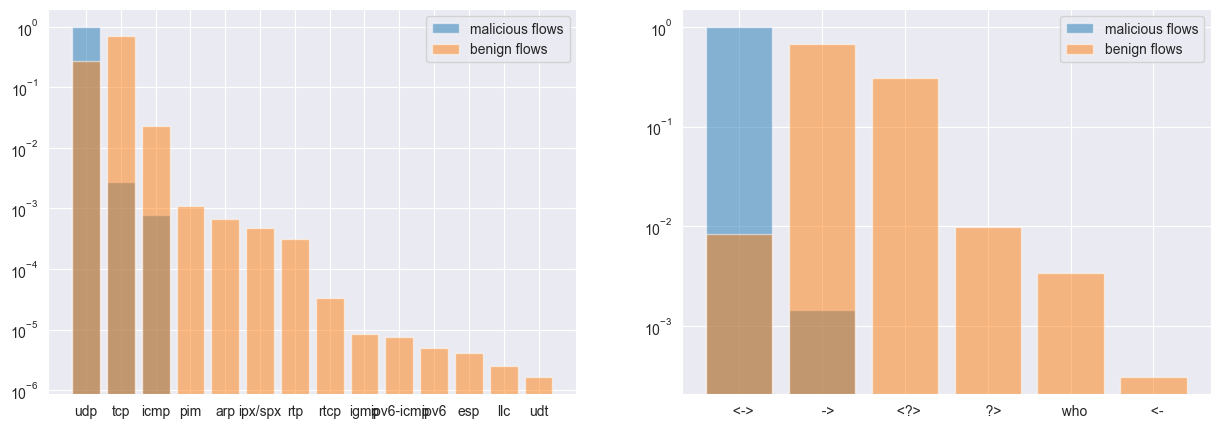

In [120]:
# Visualize the distribution of the features

# Select two features
feature1 = 'Proto'
feature2 = 'Dir'

# Plot the distribution of the features normalized
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ax[0].hist(malicious_flows[feature1], bins=50, alpha=0.5, label='malicious flows', density=True)
# ax[0].hist(benign_flows[feature1], bins=50, alpha=0.5, label='benign flows', density=True)
ax[0].bar(malicious_flows[feature1].unique(), malicious_flows[feature1].value_counts(normalize=True), alpha=0.5,
          label='malicious flows')
ax[0].bar(benign_flows[feature1].unique(), benign_flows[feature1].value_counts(normalize=True), alpha=0.5,
          label='benign flows')
ax[1].bar(malicious_flows[feature2].unique(), malicious_flows[feature2].value_counts(normalize=True), alpha=0.5,
          label='malicious flows')
ax[1].bar(benign_flows[feature2].unique(), benign_flows[feature2].value_counts(normalize=True), alpha=0.5,
          label='benign flows')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()

### 1b. Discretize selected features

Using attribute mappings to discretize the selected features.

In [121]:
from typing import Dict


def netflow_discretize(data_df: pd.DataFrame, feature_maps: Dict[str, Dict]):
    """Netflow encoding using attribute mappings.

    Attributes:
        data_df (pd.DataFrame): data with features used in discretization
        feature_maps (Dict[str, Dict]): map of attributes to their encoders
    """
    attr_count = np.prod([len(feature_maps[attr].keys()) for attr in feature_maps])

    def map_values(row):
        return [feature_maps[col].get(val, val) for col, val in row.items()]

    # Vectorized feature transformation
    transformed_data = data_df.apply(map_values, axis=1, result_type='broadcast')

    space_sizes = attr_count / np.cumprod([len(feature_maps[col].keys()) for col in data_df.columns])

    # The calculation is performed along the rows (axis=1)
    codes = (transformed_data * space_sizes).sum(axis=1)

    data_df['code'] = codes
    return data_df

Botnet host with the most flows is investigated.

In [122]:
most_evil_host = malicious_flows["SrcAddr"].value_counts().index[0]
most_evil_host

'147.32.84.205'

Features are mapped to integers based on the number of rows they occur in the data.

In [123]:
# Sort array of unique values of feature1 based on the number of rows it occurs in df
feature1_sorted = list(df[feature1].value_counts().index)
feature2_sorted = list(df[feature2].value_counts().index)

print("Feature1 sorted: ", feature1_sorted)
print("Feature2 sorted: ", feature2_sorted)

feature1_mapping = dict(zip(feature1_sorted, range(len(feature1_sorted))))
feature2_mapping = dict(zip(feature2_sorted, range(len(feature2_sorted))))

print("Feature1 mapping: ", feature1_mapping)
print("Feature2 mapping: ", feature2_mapping)

Feature1 sorted:  ['udp', 'tcp', 'icmp', 'igmp', 'rtp', 'rtcp', 'arp', 'ipv6-icmp', 'esp', 'ipx/spx', 'ipv6', 'pim', 'udt', 'llc']
Feature2 sorted:  ['  <->', '   ->', '  <?>', '  <-', '   ?>', '  who']
Feature1 mapping:  {'udp': 0, 'tcp': 1, 'icmp': 2, 'igmp': 3, 'rtp': 4, 'rtcp': 5, 'arp': 6, 'ipv6-icmp': 7, 'esp': 8, 'ipx/spx': 9, 'ipv6': 10, 'pim': 11, 'udt': 12, 'llc': 13}
Feature2 mapping:  {'  <->': 0, '   ->': 1, '  <?>': 2, '  <-': 3, '   ?>': 4, '  who': 5}


In [124]:
feat_map = {feature1: feature1_mapping, feature2: feature2_mapping}

host_df = df[df["SrcAddr"] == most_evil_host][[feature1, feature2]]

In [125]:
# Discretize the selected features for the chosen host
discretized_malicious_df = netflow_discretize(host_df.copy(), feat_map)
discretized_malicious_df.head(30)

,Proto,Dir,code
172713,udp,<->,0.0
172838,udp,<->,0.0
172839,tcp,->,7.0
172971,udp,<->,0.0
172972,udp,->,1.0
209871,udp,<->,0.0
209873,tcp,->,7.0
276431,udp,<->,0.0
276714,udp,<->,0.0
276715,tcp,->,7.0


In [126]:
# Discretize the selected features for the benign hosts
benign_hosts_df = benign_flows[[feature1, feature2]]
discretized_benign_df = netflow_discretize(benign_hosts_df.copy(), feat_map)
discretized_benign_df

,Proto,Dir,code
0,tcp,->,7.0
1,tcp,<?>,8.0
2,tcp,->,7.0
3,tcp,->,7.0
4,tcp,->,7.0
...,...,...,...
1309786,tcp,->,7.0
1309787,udp,<->,0.0
1309788,udp,<->,0.0
1309789,udp,->,1.0


In [127]:
# Discretize the selected features for all hosts
all_hosts_df = df[[feature1, feature2]]
discretized_all_df = netflow_discretize(all_hosts_df.copy(), feat_map)
discretized_all_df

,Proto,Dir,code
0,tcp,->,7.0
1,tcp,<?>,8.0
2,tcp,->,7.0
3,tcp,->,7.0
4,tcp,->,7.0
...,...,...,...
1309786,tcp,->,7.0
1309787,udp,<->,0.0
1309788,udp,<->,0.0
1309789,udp,->,1.0


Text(0.5, 1.0, 'Distribution of the code for the chosen host and benign hosts')

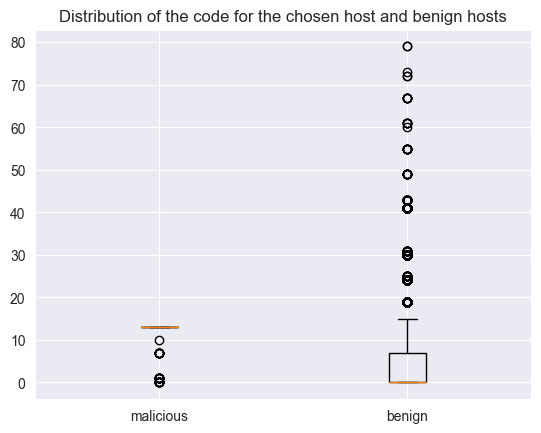

In [128]:
# Plot the distribution of the flow codes for the chosen host and benign hosts
fig, ax = plt.subplots()
ax.boxplot([discretized_malicious_df['code'], discretized_benign_df['code']])
ax.set_xticklabels(['malicious', 'benign'])
plt.title("Distribution of the code for the chosen host and benign hosts")

Text(0.5, 1.0, 'Distribution of the code for the chosen host and all hosts')

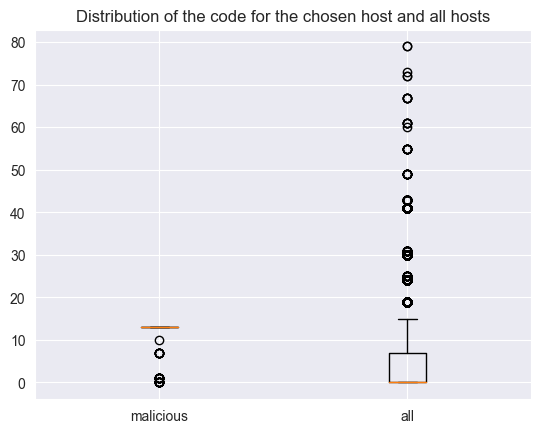

In [129]:
# Plot the distribution of the flow codes for the chosen host and benign hosts
fig, ax = plt.subplots()
ax.boxplot([discretized_malicious_df['code'], discretized_all_df['code']])
ax.set_xticklabels(['malicious', 'all'])
plt.title("Distribution of the code for the chosen host and all hosts")

### 1c. Answers and explanation

From the initial analysis of the processed data, we deduced that Proto and Dir features show the largest difference in distribution between malicious and non-malicious hosts. Having discretized the flows of a selected malicious host and all other host, it is clearly visible that the distribution of the flow codes is different. While the distribution of flows of non-malicious hosts is heavily centered around 0, while the codes of the malicious host are larger with most of them being equal to 13. Therefore, it seems that the attacks of the selected host usually have one specific direction (->) and follow one protocol (icmp).

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


Some further pre-processing.

In [130]:
from datetime import datetime

# Convert StartTime to datetime format
date_format = "%Y/%m/%d %H:%M:%S.%f"

df['StartTime'] = df['StartTime'].apply(lambda x: datetime.strptime(x, date_format))

In [131]:
discretized_all_df['StartTime'] = df['StartTime'].copy()

Count-Min sketch implementation and helper functions.

In [132]:
HASH_PRIME = 786433

class HashFunc:
    """Hash function for the Count-Min sketch."""

    def __init__(self, a, b, p, m):
        self.a = a
        self.b = b
        self.p = p
        self.m = m

    def __call__(self, x):
        return int(((self.a * x + self.b) % self.p) % self.m)


def cm_sketch(trigrams, height, width):
    """Count-Min sketch implementation."""

    # Create a matrix of zeros
    sketch = np.zeros((height, width), dtype=np.int32)

    # Create hash functions
    hash_funcs = [HashFunc(np.random.randint(1, HASH_PRIME), np.random.randint(1, HASH_PRIME), HASH_PRIME, width) for
                  _ in range(height)]

    # Vectorize hash functions to make the code run faster
    v_hash_funcs = [np.vectorize(hash_func) for hash_func in hash_funcs]

    # Update the sketch
    for i, v_hash_func in enumerate(v_hash_funcs):
        indices = v_hash_func(trigrams)
        np.add.at(sketch[i], indices, 1)

    return sketch, hash_funcs


def cm_sketch_query(sketch, hash_funcs, trigram):
    """Find the minimum value for a given trigram in the sketch."""

    # Get the minimum value from the sketch
    return np.min([sketch[i, hash_func(trigram)] for i, hash_func in enumerate(hash_funcs)])

def cm_sketch_query_all(sketch, hash_funcs, trigrams):
    """Find the minimum value for all existing trigram in the sketch."""

    # Create a dictionary of trigram: count
    return {trigram: cm_sketch_query(sketch, hash_funcs, trigram) for trigram in trigrams}


def create_trigrams_from_netflows(netflows):
    """Create trigrams from netflows. Encode the trigrams as integers."""

    # Sort the netflows according to time
    sorted_netflows = netflows.sort_values(by=['StartTime'])

    # Convert the codes to numpy array to make the process faster
    codes = sorted_netflows['code'].to_numpy()

    # Create trigrams
    # trigrams = [10000 * codes[i] + 100 * codes[i + 1] + codes[i + 2] for i in range(len(codes) - 2)]
    trigrams = [encode_trigram((codes[i], codes[i+1], codes[i+2])) for i in range(len(codes) - 2)]


    return trigrams

def translate_encoded_trigram(trigram):
    """Translate the integer-encoded trigram back to the original values."""

    return (trigram // 10000, (trigram % 10000) // 100, trigram % 100)

def encode_trigram(trigram):
    """Encode the trigram as an integer."""
    # Find the maximum number of digits in the trigram
    max_digits = max([len(str(trigram[i])) for i in range(3)])

    return 10**(max_digits*2) * trigram[0] + 10**max_digits * trigram[1] + trigram[2]

In [133]:
def run_cm_sketch(trigrams, height, width):
    """Run the full algorithm, that is run the Count-Min sketch, query it, and return counts of the trigrams."""
    # Create the sketch
    sketch, hash_funcs = cm_sketch(trigrams, height, width)
    # Print type of elements in sketch ndarray
    print("Type of elements in sketch ndarray: ", sketch.dtype)
    # Query the sketch
    trigram_count_dict = cm_sketch_query_all(sketch, hash_funcs, np.unique(trigrams, axis=0))
    # Sort the trigram count dictionary
    trigram_count_dict = dict(sorted(trigram_count_dict.items(), key=lambda item: item[1], reverse=True))
    # Translate the encoded trigrams back to the original values
    trigram_count_dict_decoded = dict(
        [(translate_encoded_trigram(trigram), count) for trigram, count in trigram_count_dict.items()])
    # Print out the largest elements
    # print("Most often occurring trigrams: ")
    for i in range(10):
        print(list(trigram_count_dict_decoded.keys())[i], list(trigram_count_dict_decoded.values())[i])
    return trigram_count_dict_decoded

In [134]:
trigrams = create_trigrams_from_netflows(discretized_all_df.copy())

In [135]:
# Check type of trigrams
print(type(trigrams[0]))

<class 'numpy.float64'>


Running the CM sketch for different width x height combinations.

In [136]:
import time

# Create dictionary for storing the results
results = {}
# Try different values for width and height, measure time and space usage
for width in [100, 1000, 10000]:
    for height in [1, 10, 100]:

        print(f"Width: {width}, Height: {height}")
        start_time = time.time()
        trigram_count_dict_decoded = run_cm_sketch(trigrams, height, width)
        print(f"Time: {time.time() - start_time}")
        print(f"Space: {width * height * 4 / 1024} KB")
        results[(width, height)] = (time.time() - start_time, width * height * 4 / 1024, trigram_count_dict_decoded)
# run_cm_sketch(trigrams, 1000, 10000)

Width: 100, Height: 1
Type of elements in sketch ndarray:  int32
(0.0, 0.0, 0.0) 490996
(0.0, 0.0, 60.0) 490996
(24.0, 0.0, 7.0) 490996
(55.0, 0.0, 0.0) 490996
(10001.0, 0.0, 24.0) 490996
(10008.0, 0.0, 10.0) 490996
(70041.0, 0.0, 30.0) 490996
(130013.0, 0.0, 41.0) 490996
(190000.0, 0.0, 1.0) 490996
(410001.0, 0.0, 0.0) 490996
Time: 1.443065881729126
Space: 0.390625 KB
Width: 100, Height: 10
Type of elements in sketch ndarray:  int32
(0.0, 0.0, 0.0) 491278
(0.0, 0.0, 7.0) 100283
(700.0, 0.0, 0.0) 97807
(0.0, 70.0, 0.0) 85152
(700.0, 70.0, 7.0) 81971
(130013.0, 0.0, 13.0) 80140
(0.0, 70.0, 7.0) 52870
(700.0, 70.0, 0.0) 52281
(700.0, 0.0, 7.0) 38671
(0.0, 0.0, 1.0) 13826
Time: 7.765353441238403
Space: 3.90625 KB
Width: 100, Height: 100
Type of elements in sketch ndarray:  int32
(0.0, 0.0, 0.0) 490830
(0.0, 0.0, 7.0) 100280
(700.0, 0.0, 0.0) 97590
(0.0, 70.0, 0.0) 84763
(700.0, 70.0, 7.0) 81864
(130013.0, 0.0, 13.0) 79985
(0.0, 70.0, 7.0) 52609
(700.0, 70.0, 0.0) 51693
(700.0, 0.0, 7.0) 3

Plotting time usage of CM sketch for width x height combinations.

Text(0, 0.5, 'Time (s)')

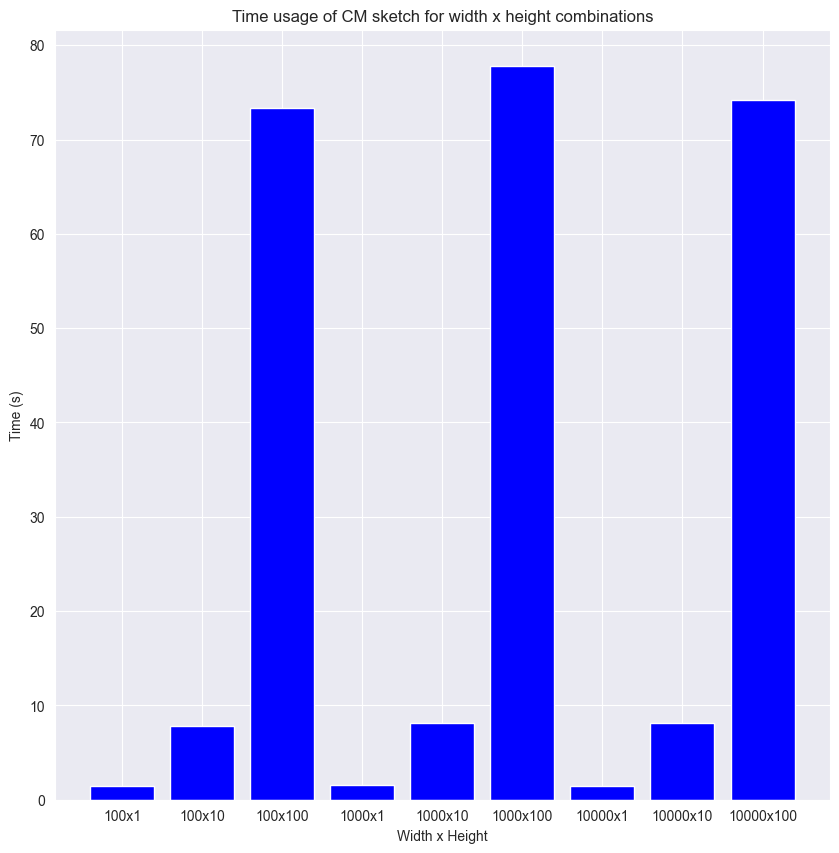

In [137]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.bar([f"{width}x{height}" for width, height in results.keys()], [time for time, space, counts in results.values()],
        color='blue')
plt.title("Time usage of CM sketch for width x height combinations")
plt.xlabel("Width x Height")
plt.ylabel("Time (s)")


Plotting space usage of CM sketch for width x height combinations.

Text(0, 0.5, 'Space (KB)')

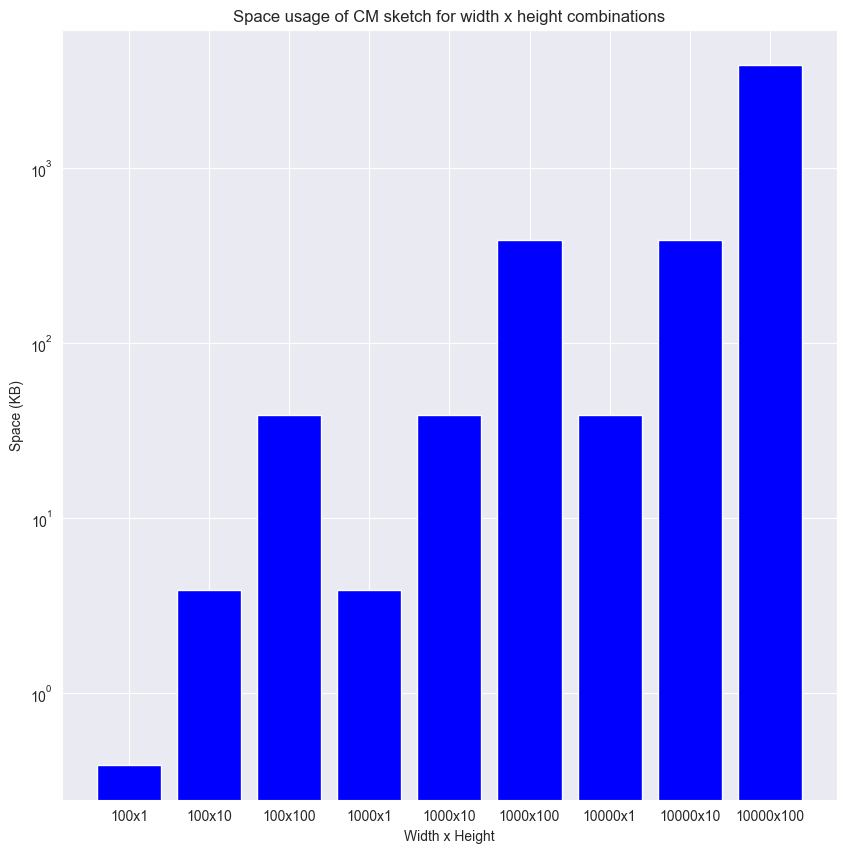

In [138]:
# Plot the results in log space

plt.figure(figsize=(10, 10))
plt.bar([f"{width}x{height}" for width, height in results.keys()], [space for time, space, counts in results.values()],
        color='blue', log=True)
plt.title("Space usage of CM sketch for width x height combinations")
plt.xlabel("Width x Height")
plt.ylabel("Space (KB)")


Plotting unique counts of CM sketch for width x height combinations to assess the accuracy of the results.

Text(0, 0.5, 'Number of unique counts')

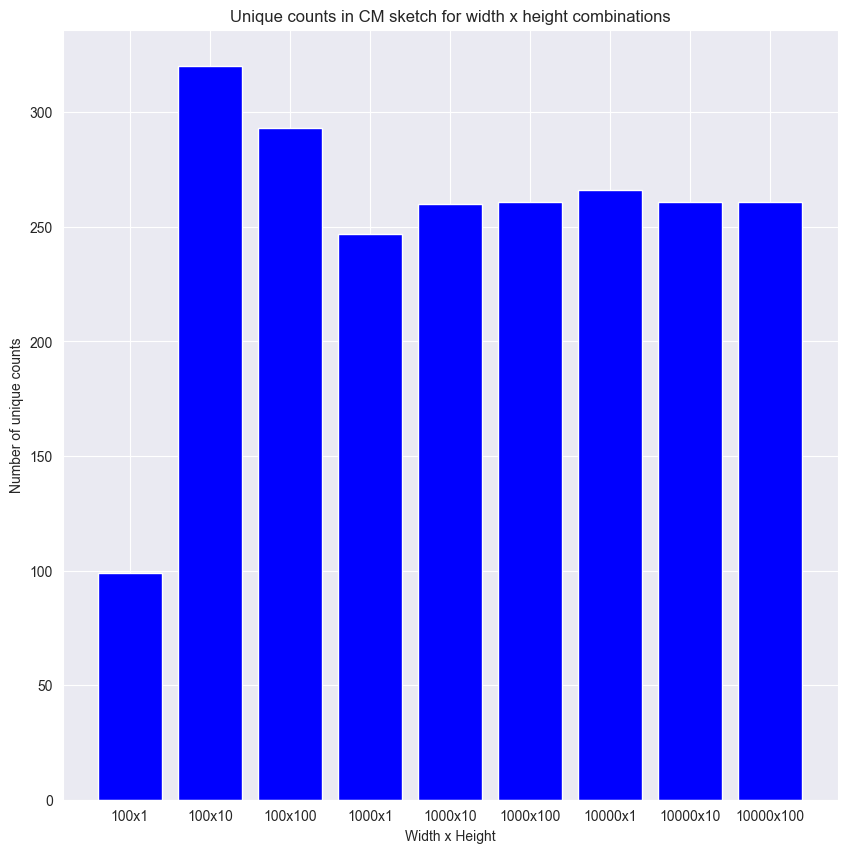

In [139]:
plt.figure(figsize=(10, 10))
plt.bar([f"{width}x{height}" for width, height in results.keys()], [len(np.unique(list(counts.values()))) for time, space, counts in results.values()],
        color='blue')
plt.title("Unique counts in CM sketch for width x height combinations")
plt.xlabel("Width x Height")
plt.ylabel("Number of unique counts")

Text(0.5, 1.0, 'Histogram of trigram counts for width=100, height=10')

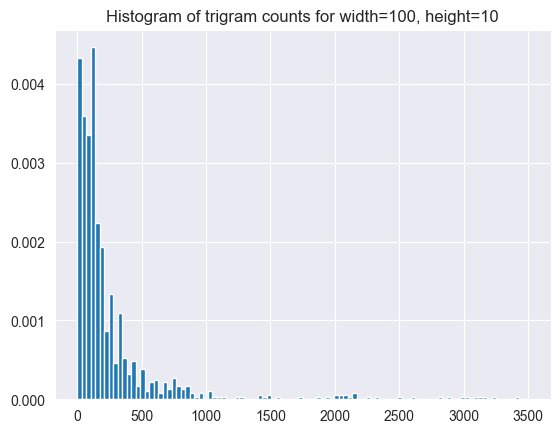

In [140]:
plt.hist(results[(100, 10)][2].values(), density=True, range=(0, 3500), bins=100)
plt.title("Histogram of trigram counts for width=100, height=10")

Text(0.5, 1.0, 'Histogram of trigram counts for width=10000, height=100')

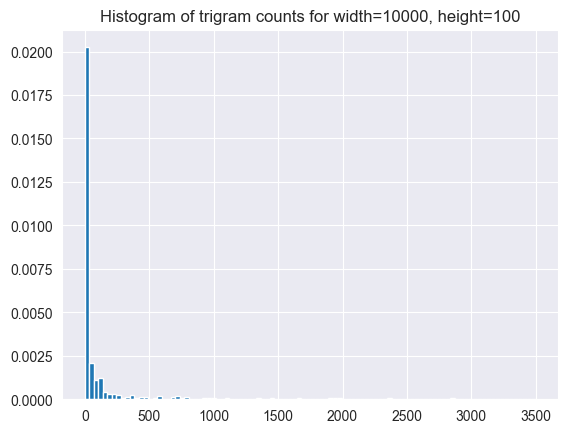

In [141]:
plt.hist(results[(10000, 100)][2].values(), density=True, range=(0, 3500), bins=100)
plt.title("Histogram of trigram counts for width=10000, height=100")

Text(0.5, 1.0, 'Histogram of trigram counts for width=10000, height=1')

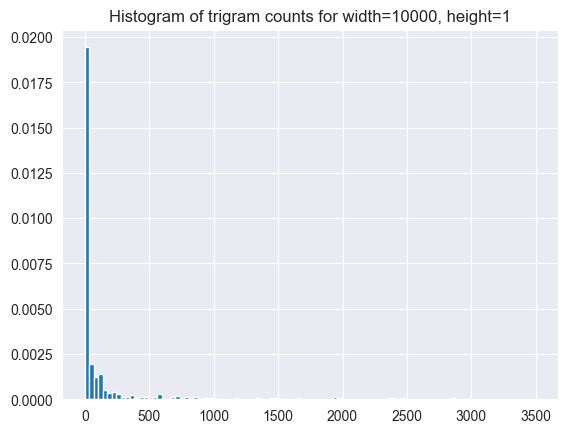

In [142]:
plt.hist(results[(10000, 1)][2].values(), density=True, range=(0, 3500), bins=100)
plt.title("Histogram of trigram counts for width=10000, height=1")

### 2b. Analysis and answers to the questions

Most commonly occurring trigrams, according to the most precise sketch (width=10000, height=100):

In [143]:
# Print out the largest elements
print("Most often occurring trigrams and their frequencies: ")
for i in range(10):
    print(list(results[(10000, 100)][2].keys())[i], list(results[(10000, 100)][2].values())[i])

Most often occurring trigrams and their frequencies: 
(0.0, 0.0, 0.0) 490817
(0.0, 0.0, 7.0) 100267
(700.0, 0.0, 0.0) 97581
(0.0, 70.0, 0.0) 84744
(700.0, 70.0, 7.0) 81837
(130013.0, 0.0, 13.0) 79955
(0.0, 70.0, 7.0) 52578
(700.0, 70.0, 0.0) 51668
(700.0, 0.0, 7.0) 38540
(0.0, 0.0, 1.0) 13715


The most occurring trigrams look correct as lower codes suggest that these are the most commonly occurring flows (values of features were labeled according to their number of occurrences in data).
From the comparison of different widths and heights of the sketch, we can see that the height of the sketch (the number of hash functions) most heavily influences the runtime. On the other hand, the space is fully dependent on the product of width and height. When it comes to the quality of the results, both number of unique counts and the histogram of the trigram counts suggest that sketches of sizes 1000x100, 10000x1, 10000x10, and 100000x100 all give practically identical distribution of counts, thus we can assume that these give use the most precise results. However, the runtime and space complexity of the sketch with width=10000 and height=1 is significantly lower than the ones of the other sketches of similar performance, which is why we can conclude that this is the best sketch for this task. This means that, in the case of examined dataset, a sketch with a large width and a small height is the best choice.
We can also conclude that the CM sketch is a good choice for the sort of tasks that require fast and memory-efficient counting of occurrences of elements in a dataset or a data stream. Still, it is important to note that our results are just an approximation, albeit a very good one, and that the accuracy of the results depends on the size of the sketch.

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.